In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv
/kaggle/input/retail-dataset/stores data-set.csv
/kaggle/input/retail-dataset/Features data set.csv
/kaggle/input/retail-dataset/sales data-set.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

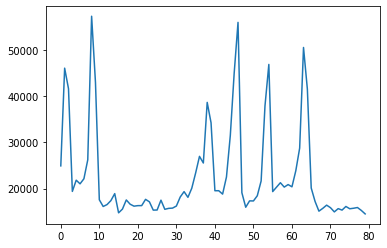

In [4]:
plt.plot(df['Weekly_Sales'][:80])

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
total_sale_by_months_overall = df.groupby(df['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().sort_values()

<Figure size 7200x7200 with 0 Axes>

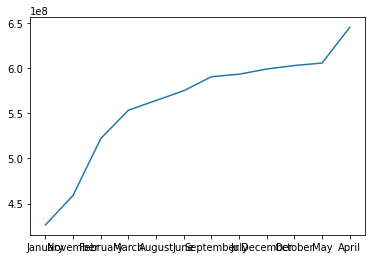

<Figure size 7200x7200 with 0 Axes>

In [7]:
plt.plot(total_sale_by_months_overall)
plt.figure(figsize=(100,100))

In [8]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [9]:
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


In [10]:
df_sales_in_holiday_week = df[['Weekly_Sales','IsHoliday']]

In [11]:
df_sales_in_holiday_week

,Weekly_Sales,IsHoliday
0,24924.50,False
1,46039.49,True
2,41595.55,False
3,19403.54,False
4,21827.90,False
...,...,...
421565,508.37,False
421566,628.10,False
421567,1061.02,False
421568,760.01,False


In [12]:
df_sales_in_holiday_week = df_sales_in_holiday_week[df_sales_in_holiday_week['IsHoliday']==True]

In [13]:
df_sales_in_holiday_week

,Weekly_Sales,IsHoliday
1,46039.49,True
31,18194.74,True
42,18820.29,True
47,19124.58,True
53,37887.17,True
...,...,...
421510,1092.66,True
421521,794.62,True
421526,553.21,True
421532,770.86,True


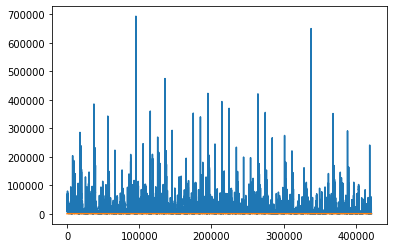

In [14]:
plt.plot(df_sales_in_holiday_week[['Weekly_Sales','IsHoliday']])

In [15]:
df_sales_in_holiday_week[['Weekly_Sales']].max()

Weekly_Sales    693099.36
dtype: float64

In [16]:
df_sales_in_holiday_week[['Weekly_Sales']].min()

Weekly_Sales   -798.0
dtype: float64

In [17]:
df_sales_in_holiday_week[df_sales_in_holiday_week['Weekly_Sales']<0]

,Weekly_Sales,IsHoliday
16298,-159.00,True
16307,-88.00,True
46364,-1.00,True
46403,-3.14,True
47130,-23.85,True
...,...,...
402335,-342.84,True
414240,-17.00,True
417814,-24.00,True
419597,-0.43,True


In [18]:
df_store_data = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')

In [19]:
df_store_data.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [20]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [21]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [22]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [23]:
df['Store'].unique(),df_store_data['Store'].unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

In [24]:
store_1_sales_df = df[df['Store'] == 1]['Weekly_Sales']

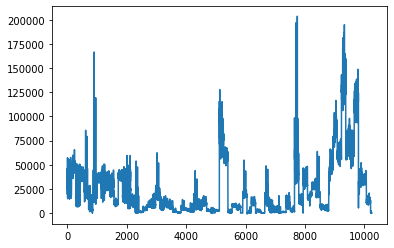

In [25]:
plt.plot(store_1_sales_df)

In [26]:
df_features = pd.read_csv('/kaggle/input/retaildataset/Features data set.csv')

In [27]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


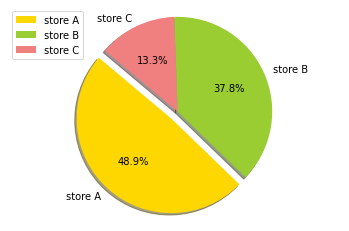

In [28]:
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

In [29]:
df_features[df_features['MarkDown1'].isna()==False]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [30]:
df_store = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')

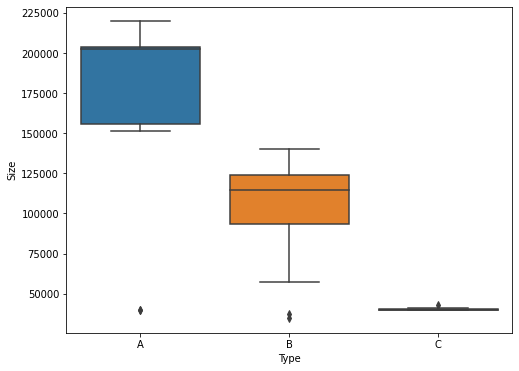

In [31]:
import seaborn as sns
store_type = pd.concat([df_store['Type'], df_store['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

1. There are 45 stores in total.
2. There are a total of 3 types of stores: Type A, B, and C.
3. By boxplot and piechart, we can say that type A store is the largest store and C is the smallest

In [32]:
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [33]:
df_store.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [34]:
df.Store.value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [35]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [36]:
total_sale_by_stores_overall = df.groupby(df['Store'])['Weekly_Sales'].sum().sort_values()

In [37]:
total_sale_by_stores_overall

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

In [38]:
check = total_sale_by_stores_overall.unique()
len(check)

45

In [39]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Text(0, 0.5, 'Store frequency')

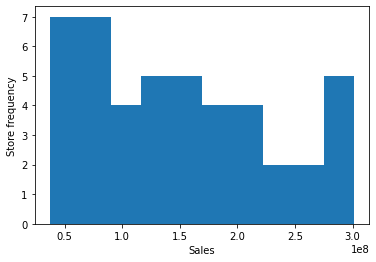

In [40]:
import numpy as np
y = np.arange(1,46,1)
plt.hist(total_sale_by_stores_overall)
plt.xlabel("Sales")
plt.ylabel("Store frequency")

In [41]:
df_store_and_sales = pd.DataFrame({'Store_no':[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],'Sales':total_sale_by_stores_overall})

<AxesSubplot:xlabel='Store_no', ylabel='Sales'>

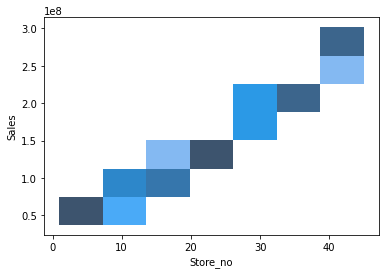

In [42]:
sns.histplot(df_store_and_sales,y=df_store_and_sales['Sales'],x=df_store_and_sales['Store_no'])

Text(0, 0.5, 'Sales')

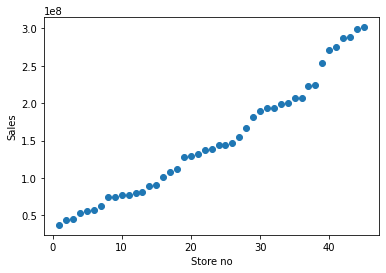

In [43]:
plt.scatter(df_store_and_sales['Store_no'],df_store_and_sales['Sales'])
plt.xlabel('Store no')
plt.ylabel('Sales')

In [44]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [45]:
df_store_data.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [46]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [47]:
df.Dept.value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [48]:
total_sale_by_dept_overall = df.groupby(df['Dept'])['Weekly_Sales'].sum().sort_values()

In [49]:
total_sale_by_dept_overall_df = pd.DataFrame({'Store':total_sale_by_dept_overall.index, 'list':total_sale_by_dept_overall.values})

Text(0, 0.5, 'Sales by department')

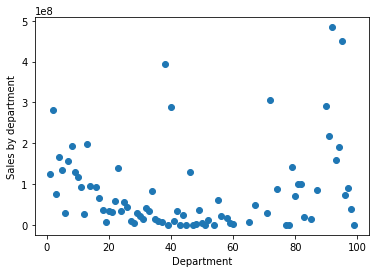

In [50]:
plt.scatter(total_sale_by_dept_overall_df['Store'],total_sale_by_dept_overall_df['list'])
plt.xlabel('Department')
plt.ylabel('Sales by department')

In [51]:
df_features['Date'] = pd.to_datetime(df_features['Date'])

In [52]:
df_merged_store_data_and_features = pd.merge(df,df_features,on='Date')

In [53]:
df_merged_store_data_and_features.columns

Index(['Store_x', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Store_y',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [54]:
df_merged_store_data_and_features.drop_duplicates('Date',inplace=True)

In [55]:
print('Correlation between Weekly Sales and IsHoliday:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['IsHoliday_x']))

Correlation between Weekly Sales and IsHoliday: 0.09006090476542446


Text(0, 0.5, 'Holiday(Y/N)')

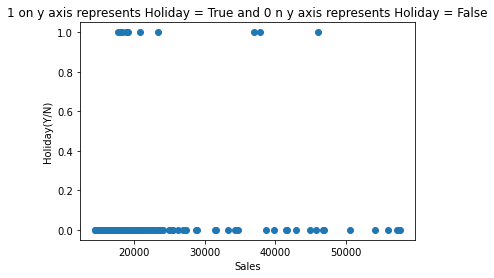

In [56]:
plt.scatter(df_merged_store_data_and_features['Weekly_Sales'],df_merged_store_data_and_features['IsHoliday_x'])
plt.title('1 on y axis represents Holiday = True and 0 n y axis represents Holiday = False')
plt.xlabel('Sales')
plt.ylabel('Holiday(Y/N)')

In [57]:
print('Correlation between Weekly Sales and CPI:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['CPI']))

Correlation between Weekly Sales and CPI: -0.0435326936506556


Text(0, 0.5, 'CPI')

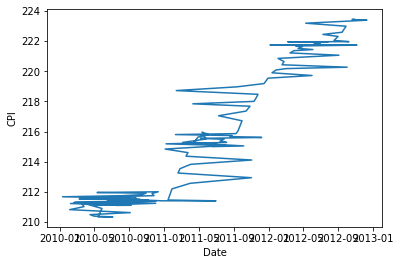

In [58]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_merged_store_data_and_features['Date'],df_merged_store_data_and_features['CPI'])
plt.xlabel('Date')
plt.ylabel('CPI')

In [59]:
df_merged_store_data_and_features

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Store_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-05-02,24924.50,False,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
132975,1,1,2010-12-02,46039.49,True,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
265995,1,1,2010-02-19,41595.55,False,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
399960,1,1,2010-02-26,19403.54,False,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
532755,1,1,2010-05-03,21827.90,False,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302985,1,1,2012-09-28,18947.81,False,1,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,False
18436275,1,1,2012-05-10,21904.47,False,1,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,False
18570195,1,1,2012-12-10,22764.01,False,1,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False
18704745,1,1,2012-10-19,24185.27,False,1,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,False


In [60]:
print('Correlation between Weekly Sales and Unemployment:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['Unemployment']))

Correlation between Weekly Sales and Unemployment: 0.10339925513962817


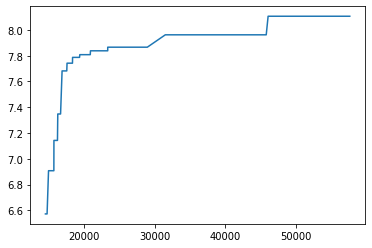

In [61]:
plt.plot(df_merged_store_data_and_features['Weekly_Sales'].sort_values(),df_merged_store_data_and_features['Unemployment'].sort_values())